<h1><center>Pet Finder EDA</center></h1>
<h2><center>Let's Adopt some puppies!</center></h2>                    
<<!--center> 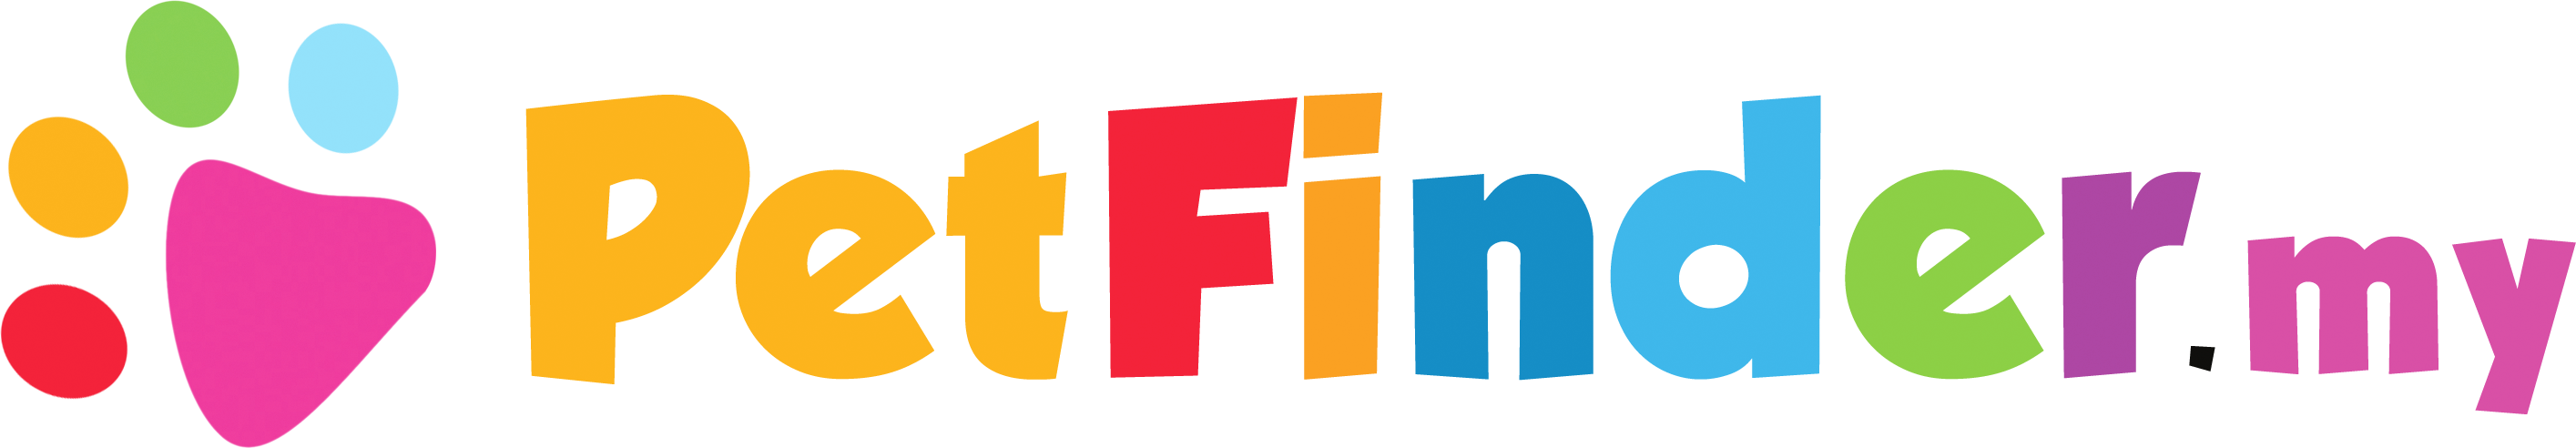</center> -->

<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#b02a4c; border:0; color:white' role="tab" aria-controls="home" ><center>Contents</center></h1>

1. [Competition Overview](#competition-overview)  
2. [Load Datasets](#load-datasets)
3. [Pawpularity Analysis](#pawpularity)
4. [Image Metadata Analysis](#metadata)
5. [Plotting Images based on Pawpularity Range](#range)
6. [Future Work](#future)


<a id="competition-overview"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#b02a4c; border:0; color:white' role="tab" aria-controls="home"><center>Competition Overview</center></h1>

### Description


A picture is worth a thousand words. But did you know a picture can save a thousand lives? Millions of stray animals suffer on the streets or are euthanized in shelters every day around the world. You might expect pets with attractive photos to generate more interest and be adopted faster. But what makes a good picture? With the help of data science, you may be able to accurately determine a pet photo’s appeal and even suggest improvements to give these rescue animals a higher chance of loving homes.

PetFinder.my is Malaysia’s leading animal welfare platform, featuring over 180,000 animals with 54,000 happily adopted. PetFinder collaborates closely with animal lovers, media, corporations, and global organizations to improve animal welfare.

Currently, PetFinder.my uses a basic Cuteness Meter to rank pet photos. It analyzes picture composition and other factors compared to the performance of thousands of pet profiles. While this basic tool is helpful, it's still in an experimental stage and the algorithm could be improved.

In this competition, you’ll analyze raw images and metadata to predict the “Pawpularity” of pet photos. You'll train and test your model on PetFinder.my's thousands of pet profiles. Winning versions will offer accurate recommendations that will improve animal welfare.


### Business Objective

1. What makes a good picture?
1. Calculate the photo's appeal
1. Find out the ways to improve picture so that photo appeal can be improved
1. Improvements to give these  animals a higher chance of loving homes

### Evaluation criteria
Root Mean Squared Error 𝑅𝑀𝑆𝐸
$$\textrm{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$


<a id="load-datasets"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#b02a4c; border:0; color:white' role="tab" aria-controls="home"><center>Load Dataset</center></h1>

### Load Training CSV File

In [ ]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as im

train_df = pd.read_csv("../input/petfinder-pawpularity-score/train.csv")
test_df = pd.read_csv("../input/petfinder-pawpularity-score/test.csv")
submission_df = pd.read_csv("../input/petfinder-pawpularity-score/sample_submission.csv")

In [ ]:
print("[INFO] Number of Training Images {}".format(train_df.shape[0]))
columns = train_df.columns
print("[INFO] Training Dataset Estimator Variable Name {}".format(columns))


In [ ]:
train_df.head(10)

In [ ]:
test_df.head(10)

In [ ]:
submission_df.head(10)

<a id="pawpularity"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#b02a4c; border:0; color:white' role="tab" aria-controls="home"><center>Pawpularity Analysis</center></h1>

### Pawpularity Score Histogram
we want to predict Pawpularity score using  Image and other binary feature related to image attribute related to pet. let's first see the distribution of Pawpularity score using Histogram.

In [ ]:
train_df["Pawpularity"].describe()

In [ ]:
sns.displot(data=train_df['Pawpularity'], kind='hist',height=7)

<a id="metadata"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#b02a4c; border:0; color:white' role="tab" aria-controls="home"><center>Image Metadata Analysis</center></h1>

### Purpose of Photo Metadata
Photo Metadata gives information about visual quality and composition information.
Metadata features are binary feature

1. **Focus** - Pet stands out against uncluttered background, not too close / far.
2. **Eyes** - Both eyes are facing front or near-front, with at least 1 eye / pupil decently clear.
3. **Face** - Decently clear face, facing front or near-front.
4. **Near** - Single pet taking up significant portion of photo (roughly over 50% of photo width or height).
5. **Action** - Pet in the middle of an action (e.g., jumping).
6. **Accessory** - Accompanying physical or digital accessory / prop (i.e. toy, digital sticker), excluding collar and leash.
7. **Group** - More than 1 pet in the photo.
8. **Collage** - Digitally-retouched photo (i.e. with digital photo frame, combination of multiple photos).
9. **Human** - Human in the photo.
10. **Occlusion** - Specific undesirable objects blocking part of the pet (i.e. human, cage or fence). Note that not all blocking objects are considered occlusion.
11. **Info** - Custom-added text or labels (i.e. pet name, description).
12. **Blur** - Noticeably out of focus or noisy, especially for the pet’s eyes and face. For Blur entries, “Eyes” column is always set to 0.


</br>

We can use histogram to see how this binary variable impacts the pawpularity score.


In [ ]:
# we will plot Graph in 4*3 size ( 4 rows, 3 colums)
figure, ax = plt.subplots(nrows=4,ncols=3, figsize=(20, 16))
ax = ax.flatten()
print(len(ax))
# skipping 1st(image) and last ( pawpularity score) column we want to plot the histogram for binary features
subsetColumns = columns[1:-1]
for idx, col in enumerate(subsetColumns):
    # plot hostogram plot of binary column vs pawpularity 
    sns.histplot(data=train_df[[col, "Pawpularity"]], hue=col, x="Pawpularity", ax=ax[idx])


<a id="range"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#b02a4c; border:0; color:white' role="tab" aria-controls="home"><center>Plotting Images based on Pawpularity Range</center></h1>

### Histogram Analysis:
1. We can see from the histogram that these matadata information has corelation with pawpularity score (less blur, less occulsion, clear face has higher rating generally.)
</br>
2. histogram is skewed and there are lots of images with perfect 100 score, there are very few images for rating between 60-80. we can further plots the images based on range of score they fall in. 

In [ ]:
# Image index for pawpularity between 1 to 25
range_1_25_Idx = np.where(train_df["Pawpularity"] <= 25)[0]
# Image index for pawpularity between 26 to 60
range_25_60_Idx = np.intersect1d(np.where(train_df["Pawpularity"] > 25)[0],np.where(train_df["Pawpularity"] <= 60)[0])
print(len(range_25_60_Idx))
# Image index for pawpularity between 61 to 99
range_60_80_idx = np.intersect1d(np.where(train_df["Pawpularity"] > 60)[0],np.where(train_df["Pawpularity"] <= 99)[0])
# # Image index for pawpularity 100
mostPopular_idx = np.where(train_df["Pawpularity"] == 100)[0]


### plot most popular image samples [Pawpularity Score = 100]

In [ ]:
mostPopularImages = train_df[train_df["Pawpularity"] ==100].index
# set seed 
np.random.seed(10)
# choose 12 index randomly
imageIndexes = np.random.choice(mostPopularImages, 12)
# create subplot 4 rows 3 columns
figure, ax = plt.subplots(nrows=3, ncols=4, figsize=(20,15))
ax = ax.flatten()

for idx,imageId in enumerate(imageIndexes):
    img_id = train_df.loc[imageId]["Id"]
    ax[idx].imshow(im.imread("../input/petfinder-pawpularity-score/train/{}.jpg".format(img_id)))
    ax[idx].title.set_text("Pawpularity score: {}".format(train_df.loc[imageId]["Pawpularity"]))
    

### plot least popular image samples [Pawpularity Score < 25]

In [ ]:
leastPopularImages = train_df[train_df["Pawpularity"] <= 25].index
# set seed 
np.random.seed(42)
# choose 12 index randomly
imageIndexes = np.random.choice(leastPopularImages, 12)
# create subplot 4 rows 3 columns
figure, ax = plt.subplots(nrows=3, ncols=4, figsize=(20,15))
ax = ax.flatten()

for idx,imageId in enumerate(imageIndexes):
    img_id = train_df.loc[imageId]["Id"]
    ax[idx].imshow(im.imread("../input/petfinder-pawpularity-score/train/{}.jpg".format(img_id)))
    ax[idx].title.set_text("Pawpularity score: {}".format(train_df.loc[imageId]["Pawpularity"]))
    

### plot  image samples [Pawpularity Score > 25 and PawPularity Score <= 60]

In [ ]:
Image_25_60 = train_df[np.logical_and(train_df["Pawpularity"] > 25 , train_df["Pawpularity"] <=60)].index
# set seed 
np.random.seed(42)
# choose 12 index randomly
imageIndexes = np.random.choice(Image_25_60, 12)
# create subplot 4 rows 3 columns
figure, ax = plt.subplots(nrows=3, ncols=4, figsize=(20,15))
ax = ax.flatten()

for idx,imageId in enumerate(imageIndexes):
    img_id = train_df.loc[imageId]["Id"]
    ax[idx].imshow(im.imread("../input/petfinder-pawpularity-score/train/{}.jpg".format(img_id)))
    ax[idx].title.set_text("Pawpularity score: {}".format(train_df.loc[imageId]["Pawpularity"]))
    

### plot  image samples [Pawpularity Score > 60 and PawPularity Score <= 99]


In [ ]:
Image_60_99 = train_df[np.logical_and(train_df["Pawpularity"] > 60 , train_df["Pawpularity"] <=99)].index
# set seed 
np.random.seed(42)
# choose 12 index randomly
imageIndexes = np.random.choice(Image_60_99, 12)
# create subplot 4 rows 3 columns
figure, ax = plt.subplots(nrows=3, ncols=4, figsize=(20,15))
ax = ax.flatten()

for idx,imageId in enumerate(imageIndexes):
    img_id = train_df.loc[imageId]["Id"]
    ax[idx].imshow(im.imread("../input/petfinder-pawpularity-score/train/{}.jpg".format(img_id)))
    ax[idx].title.set_text("Pawpularity score: {}".format(train_df.loc[imageId]["Pawpularity"]))
    

<a id="future"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#b02a4c; border:0; color:white' role="tab" aria-controls="home"><center>Future Work</center></h1>

I want to explore more on Image features, I am also considering to predict the meta data information based on image features and some features.